# Why estimate $f$?

## Prediction

In [11]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

We can think of a given dataset upon which we are working as a representation of some actual phenomenon. We can imagine there to be some sort of "universal" function, $f$, that was used to generate the data, one that we can never truly know.

As data scientists, we will seek to estimate this function. We will call our estimate $\hat{f}$ ("eff hat").

## Why estimate $f$?

There are two main reasons we might want to estimate $f$ with $\hat{f}$:

- prediction
   - given some set of known inputs and known outputs, we may wish to create some function that can take a new set of inputs and predict what the output would be for these inputs
- inference
   - given some set of known inputs and (optionally) known outputs, we may wish to understand how the inputs (and outputs) interact with each other

In [12]:
%pwd

'/home/sleepsux/uclax-data-science/01-iris-03-why-estimate-f'

### What does `pwd` tell us? What does this mean in the context of a Jupyter Notebook? Why would it be important to think about this before we load a csv file?

"print working directory", which means to display the current directory that you are 'working' currently in. 
It is important because if we give a relative path to the file instead of an absolute, the data set file won't be found, or you may load a wrong data set. 

In [13]:
%ls

04-why-estimate-f-prediction.html   06-multicollinearity.ipynb
04-why-estimate-f-prediction.ipynb  07-why-estimate-f-inference.html
05-the-train-test-split.html        07-why-estimate-f-inference.ipynb
05-the-train-test-split.ipynb       data/
06-multicollinearity.html


## The Iris Dataset

Let us consider the Iris dataset.

In [14]:
%ls 01-iris-02-numerical-python/

ls: cannot access '01-iris-02-numerical-python/': No such file or directory


In [15]:
%ls 01-iris-02-numerical-python/data

ls: cannot access '01-iris-02-numerical-python/data': No such file or directory


### Copy (`cp`) the data into this project (`01-iris-03-why-estimate-f`) into a folder called `data`

### Find the iris data and update the variable below

In [16]:
%cd /home/sleepsux/uclax-data-science/

/home/sleepsux/uclax-data-science


In [17]:
%cp 01-iris-02-numerical-python/data/iris.csv \01-iris-03-why-estimate-f/data/

In [18]:
%cd ~
%ls

/home/sleepsux
seeds/  uclax-data-science/


In [19]:
IRIS_DATA_LOCATION = '~/uclax-data-science/01-iris-03-why-estimate-f/data/iris.csv'

In [20]:
### v--- SHHH, THERE'S A SECRET TEST HERE


In [21]:
iris_df = pd.read_csv(IRIS_DATA_LOCATION, index_col=0)

### What library did we use to load the csv? What does the argument `index_col=0` do?

The panda library. Column to use as the row labels.

In [22]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1440x720 with 0 Axes>

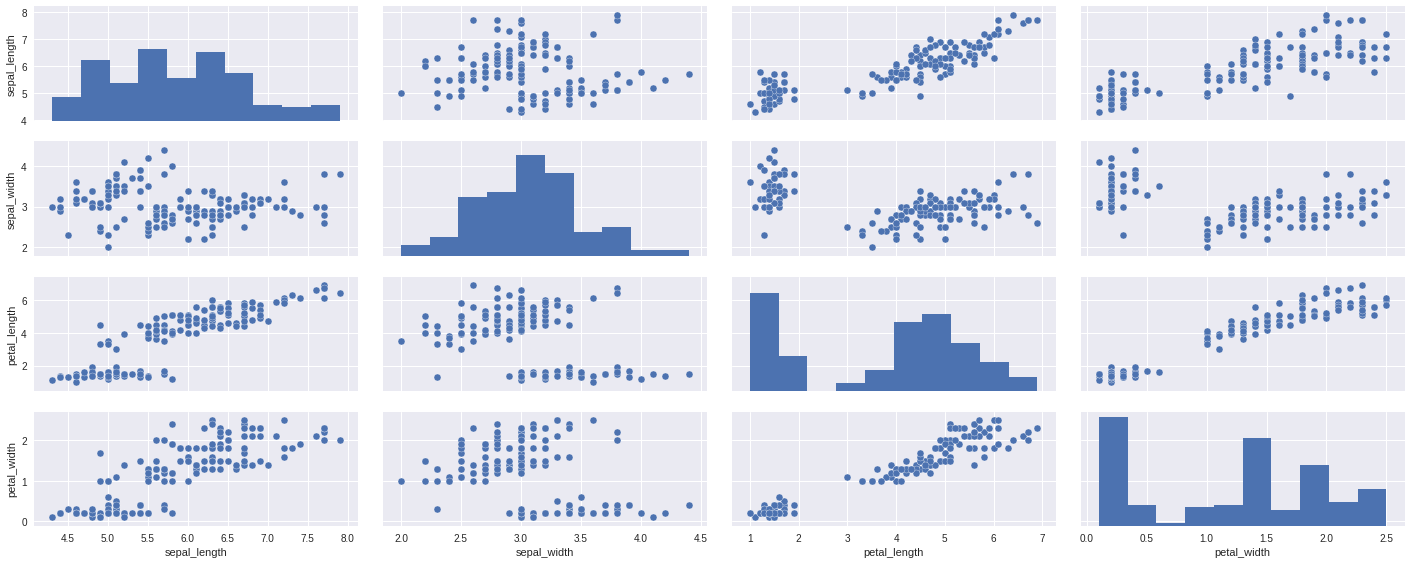

In [24]:
plt.figure(1, (20,10))

sns.pairplot(iris_df, size=2, aspect=2.5)

Having a look at the pair plot, we might say that we are able to predict petal width if we know petal length.

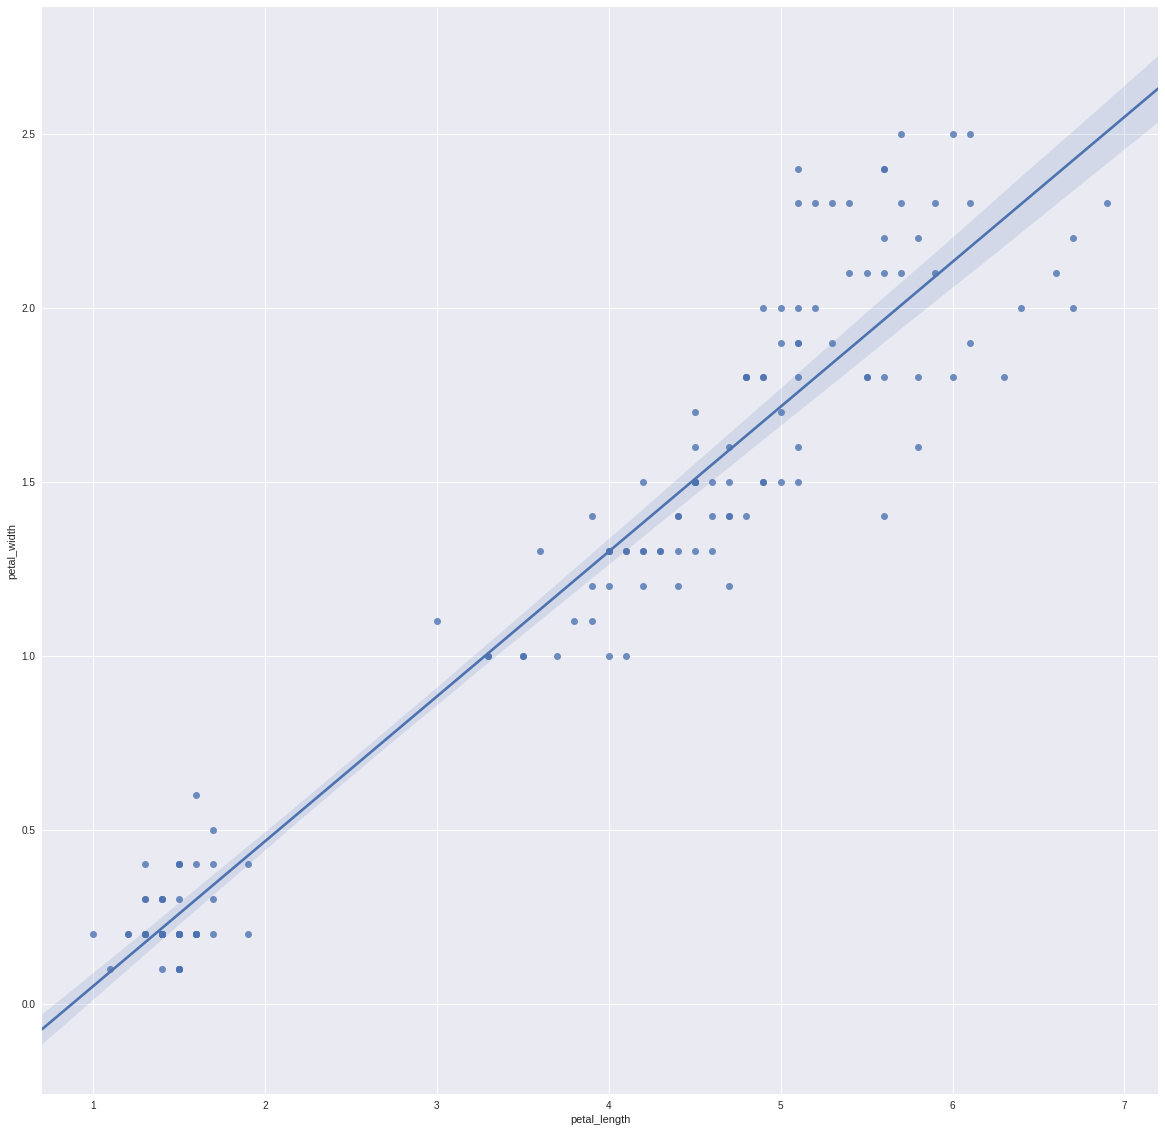

In [25]:
plt.figure(1, (20,20))

sns.regplot('petal_length', 'petal_width', data=iris_df)

## Linear Regression

We might build a **simple regression model** to do this for us using scikit-learn. Here, the **input variable** would be `petal length` and the **output variable** would be `petal width`.

We will usually refer to our input variable(s) as **feature(s)** and our output variable as the **target**.

### Build a Simple Regression Model

In [26]:
from patsy import dmatrices

target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Plot the Results

Having prepared the regression model, we use it to make predictions.

We then plot the predictions versus the actual values.


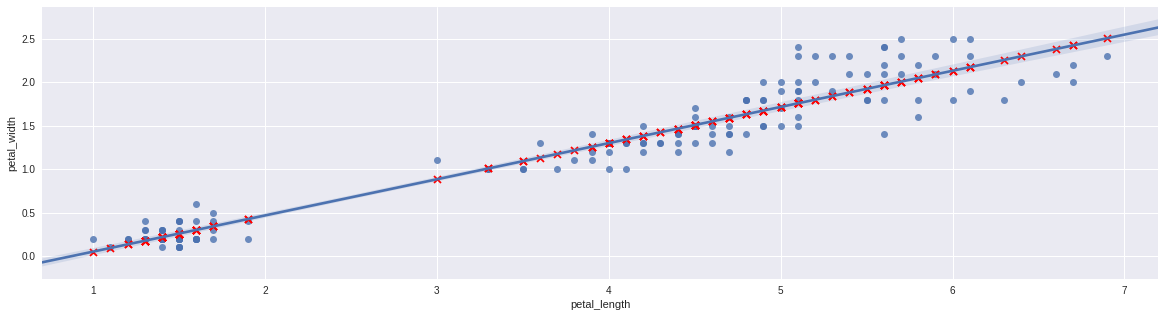

In [30]:
plt.figure(1, (20,5))

sns.regplot('petal_length', 'petal_width', data=iris_df)

predictions = linear_regression_model.predict(features)
plt.scatter(iris_df.petal_length, predictions, marker='x', color='red')

### What does this plot show us? 

The best estimate for finding a petal width with it's corresponding petal length